# Bayesian Model Class Selection

### The Simple Idea: Picking the Best Tool for the Job

Imagine you have a messy room (your observed **data**, $D$), and you have several different cleaning tools (different **model classes**, $M_1, M_2, \ldots, M_{N_M}$). Each tool represents a different way to explain or "clean up" the mess.

*   **Model Class ($M_j$):** A specific type of explanation. For example, "the mess was made by a cat" ($M_1$), or "the mess was made by a toddler" ($M_2$), or "it's just accumulated dust" ($M_3$).
*   **Data ($D$):** The actual observations. For example, "knocked-over vase, muddy paw prints, ball of yarn."
*   **The Set of All Considered Models ($\mathfrak{M}$):** The collection of all tools you're considering: $\mathfrak{M} = \{M_1, M_2, M_3\}$.

**The Goal:** You want to figure out which tool (model class) is the most likely explanation for the messy room (data), given what you see and any prior beliefs you have about how likely each tool is to be the cause.

Bayesian model selection provides a formal way to:
1.  Quantify how well each model class explains the data.
2.  Incorporate any prior beliefs about the models.
3.  Calculate the updated probability (posterior probability) of each model class being the "true" one, after observing the data.

You then pick the model class with the highest posterior probability, or you might consider a few top contenders.

### Deepening into the Details

The core of Bayesian model class selection is Bayes' theorem, applied at the level of model classes. We want to calculate the **posterior probability of a model class $M_j$ given the data $D$ and the set of considered model classes $\mathfrak{M}$**, denoted as $P(M_j | D, \mathfrak{M})$.

The formula is:

$P(M_j | D, \mathfrak{M}) = \frac{p(D | M_j) P(M_j | \mathfrak{M})}{\sum_{i=1}^{N_M} p(D | M_i) P(M_i | \mathfrak{M})}$

Let's break down each term:

1.  **$P(M_j | D, \mathfrak{M})$: Posterior Probability of Model $M_j$**
    *   This is what we want to calculate. It represents our belief in model $M_j$ being the best explanation for the data $D$, *after* we have seen the data, considering it's one of the models in the set $\mathfrak{M}$.
    *   The model class with the highest posterior probability is considered the most plausible.

2.  **$p(D | M_j)$: Marginal Likelihood (or Evidence) for Model $M_j$**
    *   This is often the most crucial and computationally challenging term.
    *   It quantifies how well model $M_j$ predicts the observed data $D$, on average, over all possible parameter values within that model.
    *   Mathematically, if model $M_j$ has parameters $\theta_j$, then the marginal likelihood is calculated by integrating (or marginalizing) out these parameters:
        $p(D | M_j) = \int p(D | \theta_j, M_j) p(\theta_j | M_j) d\theta_j$
        *   $p(D | \theta_j, M_j)$ is the standard likelihood of the data given specific parameters $\theta_j$ under model $M_j$.
        *   $p(\theta_j | M_j)$ is the prior probability distribution of the parameters $\theta_j$ for model $M_j$.
    *   The marginal likelihood naturally penalizes model complexity (an "Occam's Razor" effect). A more complex model (with more parameters or wider parameter priors) has to spread its predictive power over a larger parameter space. To achieve a high marginal likelihood, it must provide a *significantly* better fit to the data to overcome this dilution.

3.  **$P(M_j | \mathfrak{M})$: Prior Probability of Model $M_j$**
    *   This represents our belief in model $M_j$ being the true model *before* observing any data, relative to the other models in the set $\mathfrak{M}$.
    *   If we have no reason to prefer one model over another initially, we often assign a uniform prior: $P(M_j | \mathfrak{M}) = 1/N_M$ for all $j$.
    *   These priors must sum to 1 over all models in $\mathfrak{M}$: $\sum_{j=1}^{N_M} P(M_j | \mathfrak{M}) = 1$.

4.  **$\sum_{i=1}^{N_M} p(D | M_i) P(M_i | \mathfrak{M})$: Normalization Constant (or Total Evidence for $\mathfrak{M}$)**
    *   This is the sum of the product of the marginal likelihood and prior probability for all models being considered.
    *   It ensures that the posterior probabilities $P(M_j | D, \mathfrak{M})$ sum to 1 over all $j$:
        $\sum_{j=1}^{N_M} P(M_j | D, \mathfrak{M}) = 1$.
    *   It represents the overall probability of observing the data $D$ given the entire set of models $\mathfrak{M}$ and their priors.

**In essence:** The posterior probability of a model is proportional to how well it explains the data (its marginal likelihood) multiplied by how much we believed in it beforehand (its prior probability). We then normalize these values across all considered models so they sum to one.

**Key Takeaway from the Text:**
The text emphasizes that models are approximations ("the model itself may not necessarily reproduce the observed system, but it is just an approximation"). Bayesian model selection helps us rank the "relative performance" of these candidate model classes in reproducing the data, providing "information about the relative extent of support" for each model.

---



## Python Code Example

Let's create a synthetic example. We'll generate data from a known underlying process (e.g., a quadratic function with noise) and then try to select between two candidate models: a linear model and a quadratic model.

For simplicity and to avoid complex numerical integration for the marginal likelihood $p(D|M_j)$, we'll use the **Bayesian Information Criterion (BIC)** as an approximation. The BIC for a model $M$ is given by:

$BIC = k \ln(n) - 2 \ln(\hat{L})$

where:
*   $n$ is the number of data points.
*   $k$ is the number of parameters in the model.
*   $\hat{L}$ is the maximized value of the likelihood function for the model (i.e., $p(D|\hat{\theta}_{MLE}, M)$).

The log marginal likelihood can be approximated by:
$\ln p(D|M) \approx \ln(\hat{L}) - \frac{k}{2} \ln(n) = -0.5 \times BIC$
So, $p(D|M) \approx \exp(-0.5 \times BIC)$.

Linear Model Results:
  Parameters (m,c): [1.38402793 0.88579274], Noise_std: 4.57
  Max Log Likelihood: -146.94
  Number of parameters (k including noise_std): 3
  BIC: 305.62

Quadratic Model Results:
  Parameters (a,b,c): [ 0.54283131  1.38404185 -3.82239735], Noise_std: 1.79
  Max Log Likelihood: -99.95
  Number of parameters (k including noise_std): 4
  BIC: 215.55

Marginal Likelihood (Linear, scaled): 2.755e-20
Marginal Likelihood (Quadratic, scaled): 1.000e+00

Posterior Probability (Linear Model): 0.0000
Posterior Probability (Quadratic Model): 1.0000


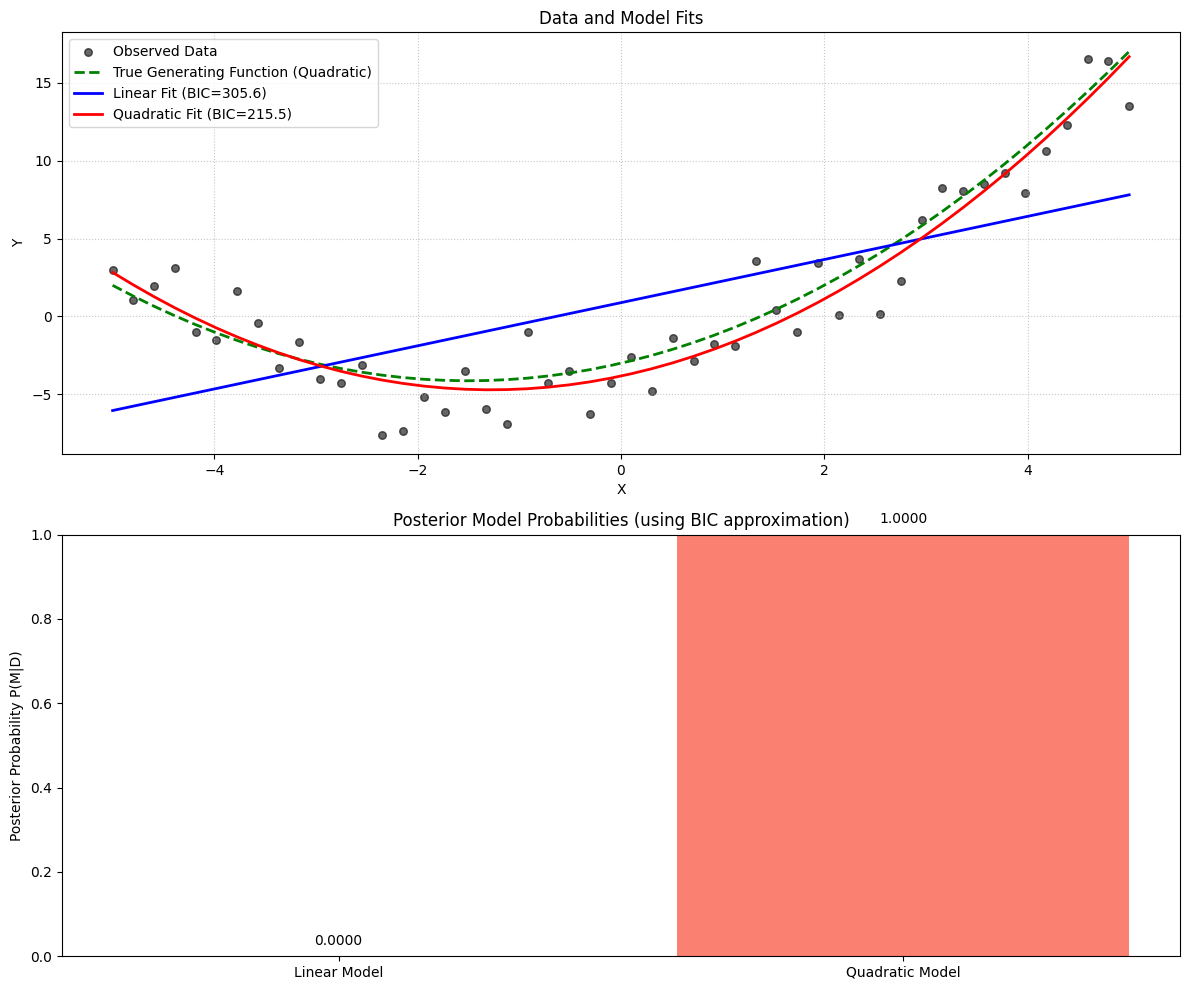


--- Varying N ---
N=10: Linear BIC=66.5, Quad BIC=42.9, P(Quad|D)=1.0000
N=20: Linear BIC=118.1, Quad BIC=95.3, P(Quad|D)=1.0000
N=50: Linear BIC=300.9, Quad BIC=216.7, P(Quad|D)=1.0000
N=100: Linear BIC=578.5, Quad BIC=437.4, P(Quad|D)=1.0000
N=200: Linear BIC=1161.7, Quad BIC=848.8, P(Quad|D)=1.0000


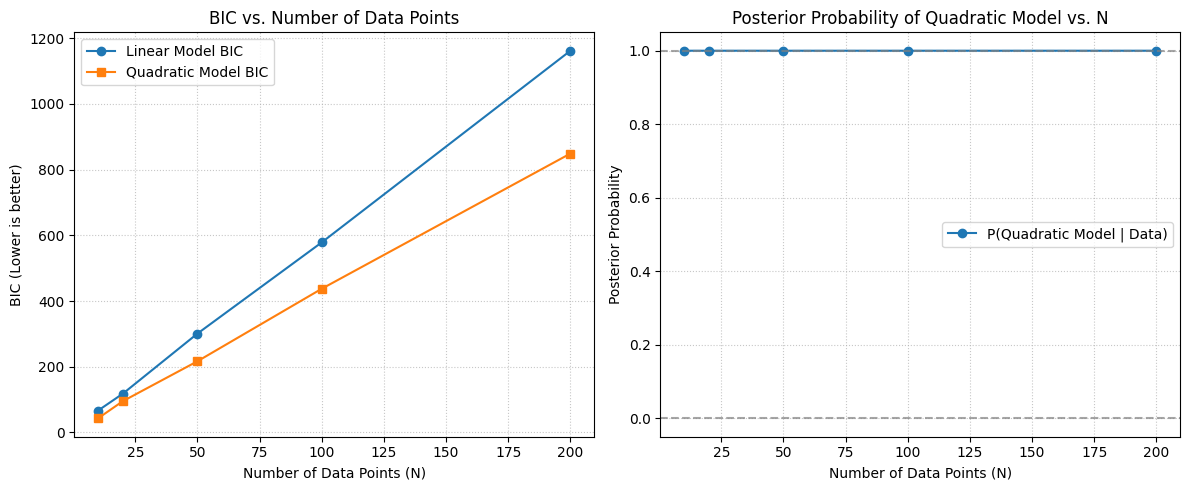

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# --- 1. Generate Synthetic Data ---
np.random.seed(42)
N_points = 50
X = np.linspace(-5, 5, N_points)

# True model is quadratic
a_true, b_true, c_true = 0.5, 1.5, -3
noise_std_true = 2.0
Y_true = a_true * X**2 + b_true * X + c_true
Y_observed = Y_true + np.random.normal(0, noise_std_true, N_points)

# --- 2. Define Model Structures and Likelihoods ---

# Model 1: Linear (M_linear: y = mx + c)
def linear_model(params, x):
    m, c = params
    return m * x + c

def neg_log_likelihood_linear(params, x, y_obs, noise_std):
    m, c = params
    y_pred = linear_model(params, x)
    # Assuming Gaussian likelihood
    log_likelihood = np.sum(norm.logpdf(y_obs, loc=y_pred, scale=noise_std))
    return -log_likelihood

# Model 2: Quadratic (M_quad: y = ax^2 + bx + c)
def quadratic_model(params, x):
    a, b, c = params
    return a * x**2 + b * x + c

def neg_log_likelihood_quadratic(params, x, y_obs, noise_std):
    a, b, c = params
    y_pred = quadratic_model(params, x)
    # Assuming Gaussian likelihood
    log_likelihood = np.sum(norm.logpdf(y_obs, loc=y_pred, scale=noise_std))
    return -log_likelihood

# --- 3. Fit Models and Calculate BIC ---

# For BIC, we need an estimate of noise_std. We can estimate it from residuals,
# or fix it for simplicity, or treat it as a parameter.
# Let's estimate it as part of the optimization for each model,
# effectively adding one more parameter to optimize for.

def fit_and_calc_bic(model_func, neg_log_likelihood_func, initial_params, x_data, y_data, num_model_params):
    # The optimizer will also find the best noise_std
    # params_with_noise = initial_params + [assumed initial noise_std]
    
    # For simplicity, let's assume noise_std is known or estimated separately
    # and is the true one for calculating likelihoods.
    # In a more rigorous BIC, noise_std would be estimated and included in 'k' if not fixed.
    # Here, let's assume noise_std is fixed at the true value for likelihood calculation,
    # but not counted in k unless explicitly estimated as a free parameter.
    # For this example, let's fix noise_std for likelihood computation and only count structural params in k.
    
    # If noise_std were also a parameter to be fit, k would increment.
    # Let's re-define NLL to optimize for noise_std as well
    
    if model_func == linear_model: # m, c, noise_std
        def nll_for_opt(params_with_noise_std, x, y):
            model_p = params_with_noise_std[:-1]
            noise_s = params_with_noise_std[-1]
            if noise_s <= 0: return np.inf # Ensure noise_std is positive
            return neg_log_likelihood_linear(model_p, x, y, noise_s)
        k = num_model_params + 1 # m, c, AND sigma
        initial_params_with_noise = initial_params + [1.0] # initial guess for noise_std
            
    elif model_func == quadratic_model: # a, b, c, noise_std
        def nll_for_opt(params_with_noise_std, x, y):
            model_p = params_with_noise_std[:-1]
            noise_s = params_with_noise_std[-1]
            if noise_s <= 0: return np.inf
            return neg_log_likelihood_quadratic(model_p, x, y, noise_s)
        k = num_model_params + 1 # a, b, c AND sigma
        initial_params_with_noise = initial_params + [1.0]
    
    else:
        raise ValueError("Unknown model function")

    result = minimize(nll_for_opt, initial_params_with_noise, args=(x_data, y_data), method='Nelder-Mead')
    
    optimized_params_full = result.x
    optimized_model_params = optimized_params_full[:-1]
    optimized_noise_std = optimized_params_full[-1]
    
    max_log_likelihood = -result.fun # Minimized negative log likelihood
    
    n = len(x_data)
    bic = k * np.log(n) - 2 * max_log_likelihood
    
    y_pred = model_func(optimized_model_params, x_data)
    
    return {
        "params": optimized_model_params,
        "noise_std": optimized_noise_std,
        "max_log_likelihood": max_log_likelihood,
        "bic": bic,
        "k": k,
        "y_pred": y_pred
    }

# Fit Linear Model
initial_linear_params = [0.0, 0.0] # m, c
num_linear_model_params = 2
linear_results = fit_and_calc_bic(linear_model, neg_log_likelihood_linear, initial_linear_params, X, Y_observed, num_linear_model_params)

# Fit Quadratic Model
initial_quadratic_params = [0.0, 0.0, 0.0] # a, b, c
num_quadratic_model_params = 3
quadratic_results = fit_and_calc_bic(quadratic_model, neg_log_likelihood_quadratic, initial_quadratic_params, X, Y_observed, num_quadratic_model_params)

print("Linear Model Results:")
print(f"  Parameters (m,c): {linear_results['params']}, Noise_std: {linear_results['noise_std']:.2f}")
print(f"  Max Log Likelihood: {linear_results['max_log_likelihood']:.2f}")
print(f"  Number of parameters (k including noise_std): {linear_results['k']}")
print(f"  BIC: {linear_results['bic']:.2f}")

print("\nQuadratic Model Results:")
print(f"  Parameters (a,b,c): {quadratic_results['params']}, Noise_std: {quadratic_results['noise_std']:.2f}")
print(f"  Max Log Likelihood: {quadratic_results['max_log_likelihood']:.2f}")
print(f"  Number of parameters (k including noise_std): {quadratic_results['k']}")
print(f"  BIC: {quadratic_results['bic']:.2f}")


# --- 4. Calculate Approximate Marginal Likelihoods and Posterior Probabilities ---

# p(D|M_j) approx exp(-0.5 * BIC_j)
# Note: these values can be extremely small, so care must be taken with underflow
# if not working in log-space. For normalization, relative values matter.
# To avoid underflow/overflow, it's common to subtract the minimum BIC before exponentiating.
min_bic = min(linear_results['bic'], quadratic_results['bic'])

log_marginal_likelihood_linear_approx = -0.5 * (linear_results['bic'] - min_bic)
log_marginal_likelihood_quadratic_approx = -0.5 * (quadratic_results['bic'] - min_bic)

# Numerically stable way to get p(D|M_j) for normalization
marginal_likelihood_linear_scaled = np.exp(log_marginal_likelihood_linear_approx)
marginal_likelihood_quadratic_scaled = np.exp(log_marginal_likelihood_quadratic_approx)

# Model Priors P(M_j | M_set) - Assuming uniform priors
# M_set = {M_linear, M_quadratic}
prior_linear = 0.5
prior_quadratic = 0.5

# Numerator terms: p(D|M_j) * P(M_j | M_set)
numerator_linear = marginal_likelihood_linear_scaled * prior_linear
numerator_quadratic = marginal_likelihood_quadratic_scaled * prior_quadratic

# Denominator (Normalization): sum_i p(D|M_i) * P(M_i | M_set)
normalization_constant = numerator_linear + numerator_quadratic

# Posterior Model Probabilities P(M_j | D, M_set)
posterior_linear = numerator_linear / normalization_constant
posterior_quadratic = numerator_quadratic / normalization_constant

print(f"\nMarginal Likelihood (Linear, scaled): {marginal_likelihood_linear_scaled:.3e}")
print(f"Marginal Likelihood (Quadratic, scaled): {marginal_likelihood_quadratic_scaled:.3e}")
print(f"\nPosterior Probability (Linear Model): {posterior_linear:.4f}")
print(f"Posterior Probability (Quadratic Model): {posterior_quadratic:.4f}")


# --- 5. Plot Results ---
plt.figure(figsize=(12, 10))

# Plot 1: Data and Model Fits
plt.subplot(2, 1, 1)
plt.scatter(X, Y_observed, label='Observed Data', color='black', s=30, alpha=0.6, zorder=1)
plt.plot(X, Y_true, label='True Generating Function (Quadratic)', color='green', linestyle='--', linewidth=2, zorder=2)
plt.plot(X, linear_results['y_pred'], label=f"Linear Fit (BIC={linear_results['bic']:.1f})", color='blue', linewidth=2, zorder=3)
plt.plot(X, quadratic_results['y_pred'], label=f"Quadratic Fit (BIC={quadratic_results['bic']:.1f})", color='red', linewidth=2, zorder=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Model Fits')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

# Plot 2: Posterior Model Probabilities
plt.subplot(2, 1, 2)
models = ['Linear Model', 'Quadratic Model']
posteriors = [posterior_linear, posterior_quadratic]
bars = plt.bar(models, posteriors, color=['skyblue', 'salmon'])
plt.ylabel('Posterior Probability P(M|D)')
plt.title('Posterior Model Probabilities (using BIC approximation)')
plt.ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- Demonstration with varying N ---
N_values = [10, 20, 50, 100, 200]
posterior_quad_over_N = []
bic_linear_over_N = []
bic_quad_over_N = []

print("\n--- Varying N ---")
for n_val in N_values:
    X_n = np.linspace(-5, 5, n_val)
    Y_true_n = a_true * X_n**2 + b_true * X_n + c_true
    Y_observed_n = Y_true_n + np.random.normal(0, noise_std_true, n_val)

    lin_res_n = fit_and_calc_bic(linear_model, neg_log_likelihood_linear, initial_linear_params, X_n, Y_observed_n, num_linear_model_params)
    quad_res_n = fit_and_calc_bic(quadratic_model, neg_log_likelihood_quadratic, initial_quadratic_params, X_n, Y_observed_n, num_quadratic_model_params)
    
    bic_linear_over_N.append(lin_res_n['bic'])
    bic_quad_over_N.append(quad_res_n['bic'])

    min_bic_n = min(lin_res_n['bic'], quad_res_n['bic'])
    log_ml_lin_n = -0.5 * (lin_res_n['bic'] - min_bic_n)
    log_ml_quad_n = -0.5 * (quad_res_n['bic'] - min_bic_n)
    
    ml_lin_n_scaled = np.exp(log_ml_lin_n)
    ml_quad_n_scaled = np.exp(log_ml_quad_n)
    
    num_lin_n = ml_lin_n_scaled * prior_linear
    num_quad_n = ml_quad_n_scaled * prior_quadratic
    norm_const_n = num_lin_n + num_quad_n
    
    post_quad_n = num_quad_n / norm_const_n
    posterior_quad_over_N.append(post_quad_n)
    print(f"N={n_val}: Linear BIC={lin_res_n['bic']:.1f}, Quad BIC={quad_res_n['bic']:.1f}, P(Quad|D)={post_quad_n:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(N_values, bic_linear_over_N, 'o-', label='Linear Model BIC')
plt.plot(N_values, bic_quad_over_N, 's-', label='Quadratic Model BIC')
plt.xlabel('Number of Data Points (N)')
plt.ylabel('BIC (Lower is better)')
plt.title('BIC vs. Number of Data Points')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(N_values, posterior_quad_over_N, 'o-', label='P(Quadratic Model | Data)')
plt.xlabel('Number of Data Points (N)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability of Quadratic Model vs. N')
plt.ylim(-0.05, 1.05)
plt.axhline(1.0, color='gray', linestyle='--', alpha=0.7)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

**Explanation of the Code:**

1.  **Generate Data:** We create synthetic data from a quadratic function with added Gaussian noise. This way, we know the "true" underlying model.
2.  **Define Models:**
    *   `linear_model`: $y = mx + c$. It has 2 structural parameters.
    *   `quadratic_model`: $y = ax^2 + bx + c$. It has 3 structural parameters.
3.  **Likelihood Functions:** `neg_log_likelihood_linear` and `neg_log_likelihood_quadratic` calculate the negative log-likelihood assuming Gaussian errors. The `fit_and_calc_bic` function also optimizes for the noise standard deviation (`noise_std`), effectively making it a parameter of each model. So the total number of parameters `k` for BIC includes this noise parameter.
4.  **Fit Models & Calculate BIC:**
    *   `scipy.optimize.minimize` is used to find the parameters (including `noise_std`) that maximize the likelihood (minimize the negative log-likelihood) for each model.
    *   The BIC is calculated for each model. A lower BIC generally indicates a better model, balancing fit and complexity.
5.  **Marginal Likelihood Approximation:** We use $p(D|M_j) \approx \exp(-0.5 \times BIC_j)$. To handle potentially very small or large numbers from the exponentiation, the BICs are shifted by `min_bic` before exponentiation. This scaling doesn't affect the final posterior probabilities as it cancels out during normalization.
6.  **Priors:** We assume uniform prior probabilities for the models ($P(M_{linear}|\mathfrak{M}) = 0.5$, $P(M_{quadratic}|\mathfrak{M}) = 0.5$).
7.  **Posterior Probabilities:** Calculated using the formula.
8.  **Plots:**
    *   The first plot shows the raw data, the true generating function, and the fits from both the linear and quadratic models, along with their BICs.
    *   The second plot is a bar chart showing the calculated posterior probabilities for each model.
    *   The third set of plots shows how BIC and the posterior probability of the (true) quadratic model change as the number of data points ($N$) increases. Generally, with more data, the evidence for the correct model becomes stronger.

**Interpreting the Output:**
When you run the code, you'll typically see that the quadratic model has a lower BIC and a much higher posterior probability than the linear model, especially as $N$ increases. This is because the data was generated from a quadratic process, and the Bayesian model selection framework (even with the BIC approximation) correctly identifies the more appropriate model class. The BIC penalizes the quadratic model for its extra parameter, but the significantly better fit to the data usually outweighs this penalty when the underlying process is indeed quadratic. The plots showing the effect of $N$ demonstrate that with more data, our confidence in selecting the correct model generally increases.

This example illustrates the core concepts: defining models, quantifying how well they fit the data while penalizing complexity (via BIC as a proxy for marginal likelihood), incorporating prior beliefs (here, uniform), and deriving posterior probabilities to select the "best" model class among the candidates.

# Side note

## Why conditioning on the complete set of models $\mathfrak{M}$ is not only sensible but *essential*:

1.  **Probabilities Need a Defined Sample Space:**
    *   In probability theory, a probability is always defined with respect to a "sample space" – the set of all possible outcomes.
    *   When we're asking "What is the probability of model $M_j$?", we implicitly mean "What is the probability of $M_j$ *out of the set of models we are currently considering*?"
    *   Without $\mathfrak{M}$, what would $P(M_j | D)$ mean? The probability of $M_j$ being the "true" model of the universe, considering *all conceivable models*? That space is infinitely large and ill-defined, making the probability calculation impossible.
    *   $\mathfrak{M} = \{M_1, M_2, \ldots, M_{N_M}\}$ **is our defined sample space of models.** We are explicitly limiting our inquiry to this set.

2.  **Normalization and Relative Comparison:**
    *   The denominator in Bayes' theorem for model selection is $\sum_{i=1}^{N_M} p(D | M_i) P(M_i | \mathfrak{M})$. This sum is taken *over all models in $\mathfrak{M}$*.
    *   This denominator ensures that the posterior probabilities $P(M_j | D, \mathfrak{M})$ sum to 1 *across the models in $\mathfrak{M}$*:
        $\sum_{j=1}^{N_M} P(M_j | D, \mathfrak{M}) = 1$.
    *   This is crucial because it allows us to interpret $P(M_j | D, \mathfrak{M})$ as the **relative degree of belief** in model $M_j$ *compared to the other models in $\mathfrak{M}$*, given the data.
    *   If we didn't condition on $\mathfrak{M}$ and somehow tried to calculate an "absolute" $P(M_j | D)$, there would be no natural way to ensure these probabilities sum to anything meaningful or that they represent a sensible distribution of belief.

3.  **Reflecting the Modeler's Choice:**
    *   The act of model selection begins with a human modeler proposing a *finite set* of candidate model classes ($\mathfrak{M}$). This set represents the hypotheses the modeler deems plausible or worthy of investigation.
    *   The conditioning on $\mathfrak{M}$ explicitly acknowledges this choice. The results are always interpreted *within the context of the models that were put on the table.*
    *   If you later decide to consider a new model $M_{N_M+1}$, you would add it to $\mathfrak{M}$ to form $\mathfrak{M}'$, and all the posterior probabilities would need to be recalculated with respect to this new, larger set. The probabilities for the original models would likely change because the "competition" has changed.

4.  **Practicality and Tractability:**
    *   We can only ever evaluate a finite number of models. The framework needs to operate within these practical constraints.
    *   Conditioning on $\mathfrak{M}$ makes the problem well-posed and computationally tractable.

## Analogy: Choosing the Best Tool

Imagine you have a toolbox $\mathfrak{M}$ containing a hammer ($M_1$), a screwdriver ($M_2$), and a wrench ($M_3$). You have a task (the data $D$), say, to hang a picture.

*   $P(\text{Hammer} | \text{Task}, \text{Toolbox})$: What's the probability the hammer is the best tool for this task, *given that these are the only tools I'm considering from my toolbox*? Imagine considering all the kinds and brands of hammers in the Universe
*   The evidence $p(\text{Task} | \text{Hammer})$ would be high.
*   The evidence $p(\text{Task} | \text{Screwdriver})$ would be low.

The sum in the denominator would be over hammer, screwdriver, and wrench. This allows you to say, "Given these three tools, the hammer has an 80% chance of being the best choice for this task."

If your toolbox $\mathfrak{M}$ only contained a spoon and a fork, your conclusion about the "best" tool for hanging a picture would be very different, and the probabilities would reflect that limited set of choices.

## What if we didn't condition on $\mathfrak{M}$?

If we tried to calculate $P(M_j|D)$ without reference to $\mathfrak{M}$, we'd be asking for an absolute probability. This runs into several issues:

*   **Philosophical:** As George Box said, "All models are wrong, but some are useful." We're not typically trying to find the "one true model of reality." We're trying to find the most useful or best-approximating model *from a set we've defined*.
*   **Mathematical:** How would you normalize? Over what set would the probabilities sum to 1?

Therefore, conditioning on $\mathfrak{M}$ is a fundamental aspect of Bayesian model selection that makes the problem coherent, interpretable, and practical. It acknowledges that our conclusions are always relative to the set of hypotheses we are willing to entertain.

# Bayes' Factor and Model Comparison

### The Simple Idea: Head-to-Head Model Showdown & Belief Updates

Imagine you have several explanations (models) for something you observed (data).

1.  **Bayes' Factor (Direct Comparison):**
    *   Sometimes, you're not interested in the absolute "best" model out of many, but just how much better one specific model ($M_i$) is compared to another specific model ($M_j$).
    *   Think of it like a direct match-up: Is model A a much stronger explanation than model B for the data we've seen?
    *   The Bayes' Factor gives you a number that tells you this. A large Bayes' Factor in favor of $M_i$ over $M_j$ means the data provides strong support for $M_i$ relative to $M_j$.

2.  **Updating Beliefs:**
    *   The bar chart shows a common scenario. Before you look at the data, you might think all your candidate models ($M_1, M_2, M_3, M_4$) are equally likely (the "Prior" light gray bars, all at 0.25).
    *   After you observe the data and do the calculations, your beliefs change. The data might strongly support one model over the others. In the example, model $M_2$ becomes much more likely (the "Posterior" dark gray bar at 0.6), while the likelihoods of $M_1, M_3,$ and $M_4$ decrease.
    *   The key is that the total probability (sum of the heights of the bars) is 1 for both prior and posterior beliefs, reflecting that one of *these considered models* is assumed to be the explanation.

### Deepening into the Details

**1. Bayes' Factor ($B_{ij}$)**

The Bayes' Factor is a central tool for comparing two models, say $M_i$ and $M_j$. It's defined as the ratio of the posterior odds for $M_i$ against $M_j$ to their prior odds:

$\frac{P(M_i | D, \mathfrak{M})}{P(M_j | D, \mathfrak{M})} = \frac{p(D | M_i, \mathfrak{M}) P(M_i | \mathfrak{M})}{p(D | M_j, \mathfrak{M}) P(M_j | \mathfrak{M})}$

Let's break this down:

*   **Left-hand side: Posterior Odds**
    *   $\frac{P(M_i | D, \mathfrak{M})}{P(M_j | D, \mathfrak{M})}$: This is the ratio of how probable model $M_i$ is to how probable model $M_j$ is, *after* seeing the data $D$ and considering the set of models $\mathfrak{M}$.

*   **Right-hand side:**
    *   $\frac{P(M_i | \mathfrak{M})}{P(M_j | \mathfrak{M})}$: This is the **Prior Odds**. It's the ratio of how probable you believed $M_i$ was compared to $M_j$ *before* seeing the data.
    *   $\frac{p(D | M_i, \mathfrak{M})}{p(D | M_j, \mathfrak{M})}$: This is the **Bayes' Factor, $B_{ij}$**. It is the ratio of the marginal likelihoods (or evidences) of the two models.
        $B_{ij} = \frac{p(D | M_i, \mathfrak{M})}{p(D | M_j, \mathfrak{M})}$

So, the equation can be rewritten as:
**Posterior Odds = Bayes' Factor × Prior Odds**

*   **Significance of Bayes' Factor:**
    *   The Bayes' Factor $B_{ij}$ quantifies the evidence provided by the data $D$ in favor of model $M_i$ over model $M_j$.
    *   If $P(M_i | \mathfrak{M}) = P(M_j | \mathfrak{M})$ (i.e., the models have equal prior probabilities, which is a common assumption if there's no prior preference), then the posterior odds are simply equal to the Bayes' Factor.
        $\frac{P(M_i | D, \mathfrak{M})}{P(M_j | D, \mathfrak{M})} = B_{ij}$
    *   The text notes this: "When the prior plausibilities of the two candidate model classes are identical... then Bayes' factor reduces to the ratio of evidences of the model classes."

*   **Interpretation of $B_{ij}$ Values (common scale by Kass and Raftery, 1995):**
    *   $1 < B_{ij} \le 3$: Weak evidence for $M_i$
    *   $3 < B_{ij} \le 20$: Positive evidence for $M_i$
    *   $20 < B_{ij} \le 150$: Strong evidence for $M_i$
    *   $B_{ij} > 150$: Very strong evidence for $M_i$
    *   (Similar categories exist for $B_{ij} < 1$, which would favor $M_j$).

*   **Advantage mentioned:** "which does not require computing the posterior over all possible model classes." This is true if you *only* want the Bayes' Factor itself, as it's just a ratio of two evidences (and possibly two priors). However, if you want the actual posterior probabilities $P(M_i|D,\mathfrak{M})$ and $P(M_j|D,\mathfrak{M})$ that make up the posterior odds, you still need the full normalization constant involving all models in $\mathfrak{M}$.

**2. Prior and Posterior Plausibilities**

This example beautifully illustrates the core idea of Bayesian updating for model selection:

*   **Set of Models $\mathfrak{M}$**: $\mathfrak{M} = \{M_1, M_2, M_3, M_4\}$.
*   **Prior Probabilities $P(M_j | \mathfrak{M})$**:
    *   Initially, there's no preference, so each model is assigned an equal prior probability: $P(M_j | \mathfrak{M}) = 0.25$ for $j=1, 2, 3, 4$.
    *   These sum to 1: $\sum_{j=1}^4 P(M_j | \mathfrak{M}) = 1$.
    *   These are the light gray bars.

*   **Posterior Probabilities $P(M_j | D, \mathfrak{M})$**:
    *   After observing data $D$ and calculating the evidence $p(D|M_j)$ for each model, the posterior probabilities are computed using the full Bayes' theorem:
        $P(M_j | D, \mathfrak{M}) = \frac{p(D | M_j) P(M_j | \mathfrak{M})}{\sum_{k=1}^{4} p(D | M_k) P(M_k | \mathfrak{M})}$
    *   The figure shows the outcome:
        *   $P(M_1 | D, \mathfrak{M}) = 0.2$
        *   $P(M_2 | D, \mathfrak{M}) = 0.6$ (Model $M_2$ is now the most plausible)
        *   $P(M_3 | D, \mathfrak{M}) = 0.1$
        *   $P(M_4 | D, \mathfrak{M}) = 0.1$
    *   These also sum to 1: $0.2 + 0.6 + 0.1 + 0.1 = 1$.
    *   These are the dark gray bars in Figure 1.5.

*   **Adding a New Model ($M_5$):**
    *   The text mentions that if a new model $M_5$ were added, the set becomes $\mathfrak{M}' = \{M_1, \ldots, M_5\}$.
    *   The prior probabilities would need to be reassigned (e.g., $P(M_j|\mathfrak{M}') = 0.2$ for $j=1,..,5$ if still uniform).
    *   All posterior probabilities would be recalculated based on this new set, and they would again sum to 1 over $\mathfrak{M}'$. This reinforces the idea that probabilities are relative to the considered set of models.

**3. The Evidence $p(D|M_j)$**

The text re-emphasizes: "An important element in any Bayesian model class selection problem is the evidence $p(D|M_j)$..."
This term, also called the **marginal likelihood**, is the probability of observing the data $D$ given that model $M_j$ is true, averaged over all possible parameter values of $M_j$. It is what allows the data to influence which model is favored. It naturally penalizes more complex models unless that complexity is justified by a significantly better fit to the data.

---

## Python Code Example

Let's extend the previous Python example. We'll:
1.  Add a third, simpler model: a "constant" model ($y=c$).
2.  Generate data from the quadratic model (as before).
3.  Fit all three models (constant, linear, quadratic).
4.  Calculate their BICs and approximate marginal likelihoods.
5.  Calculate posterior probabilities for all three models (assuming uniform priors).
6.  Calculate and interpret Bayes' Factors for pairs of models.
7.  Plot prior and posterior probabilities.

Constant Model Results:
  Parameters: [0.88573799], Noise_std: 6.13
  Max Log Likelihood: -161.57
  Number of parameters (k incl. noise): 2
  BIC: 330.96

Linear Model Results:
  Parameters: [1.38402793 0.88579274], Noise_std: 4.57
  Max Log Likelihood: -146.94
  Number of parameters (k incl. noise): 3
  BIC: 305.62

Quadratic Model Results:
  Parameters: [ 0.54283131  1.38404185 -3.82239735], Noise_std: 1.79
  Max Log Likelihood: -99.95
  Number of parameters (k incl. noise): 4
  BIC: 215.55

Constant Model:
  Scaled Marginal Likelihood (approx): 8.688e-26
  Prior Probability: 0.333
  Posterior Probability: 0.0000

Linear Model:
  Scaled Marginal Likelihood (approx): 2.755e-20
  Prior Probability: 0.333
  Posterior Probability: 0.0000

Quadratic Model:
  Scaled Marginal Likelihood (approx): 1.000e+00
  Prior Probability: 0.333
  Posterior Probability: 1.0000

Bayes' Factor (Quadratic vs Linear) B_21: 3.63e+19
Bayes' Factor (Quadratic vs Constant) B_20: 1.15e+25
Bayes' Factor (Linear v

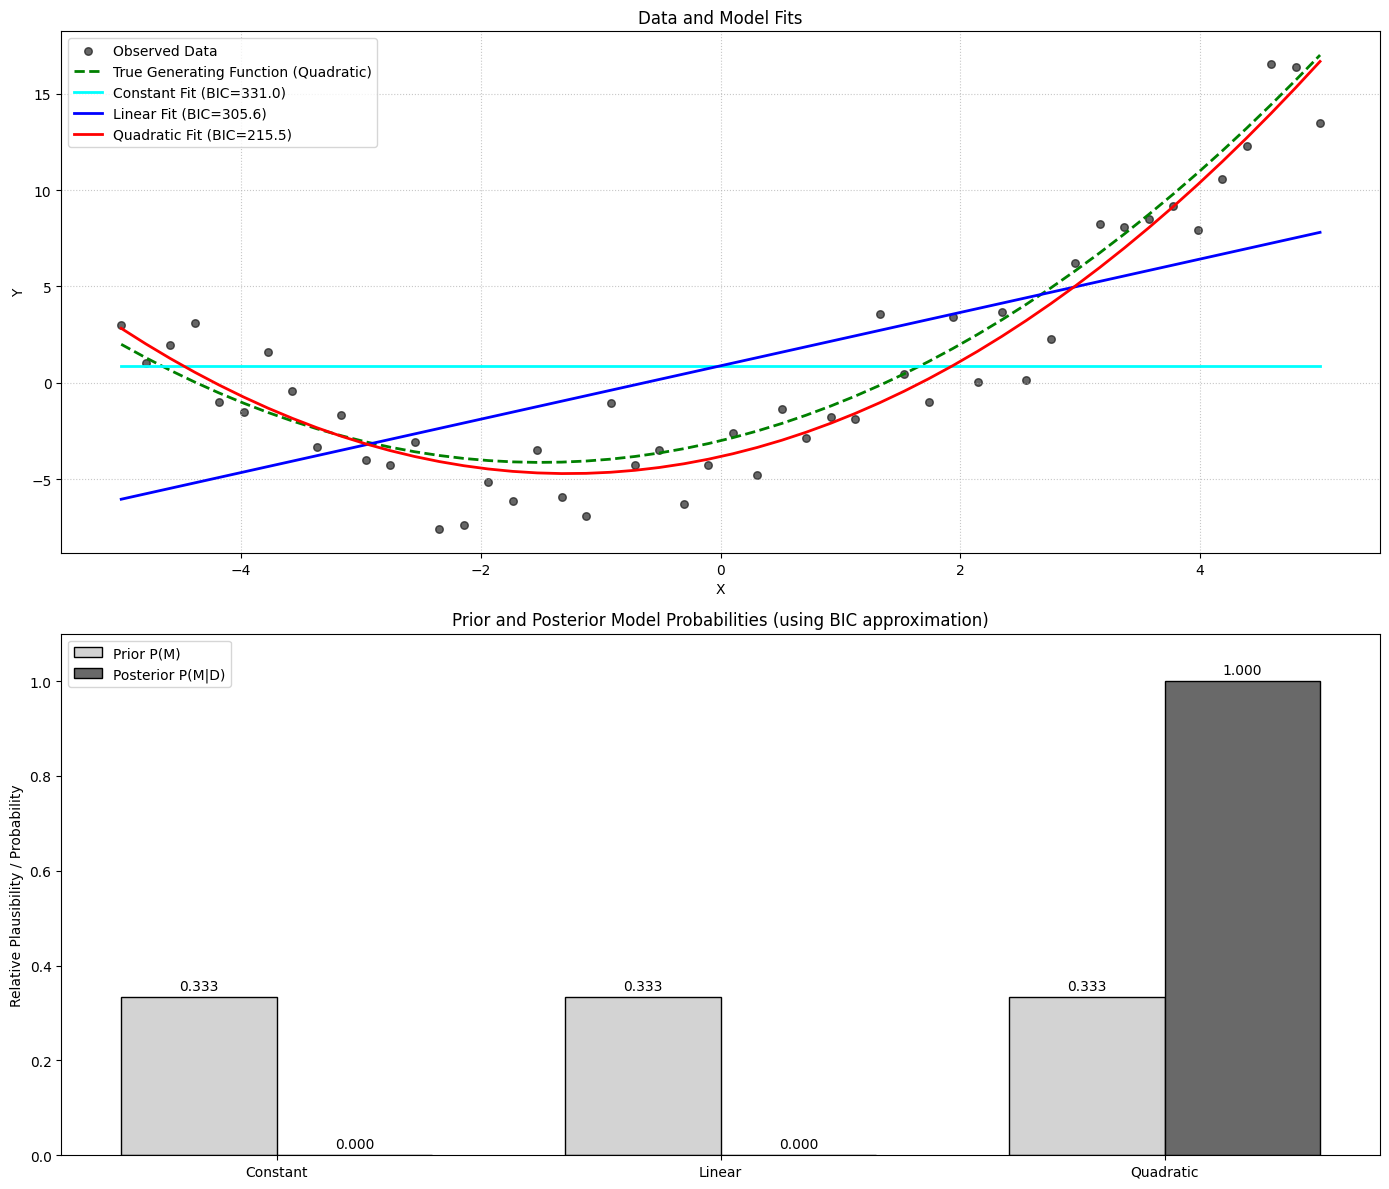

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# --- 1. Generate Synthetic Data ---
np.random.seed(42)
N_points = 50
X = np.linspace(-5, 5, N_points)

# True model is quadratic
a_true, b_true, c_true = 0.5, 1.5, -3
noise_std_true = 2.0 # Assume this is the true noise standard deviation
Y_true = a_true * X**2 + b_true * X + c_true
Y_observed = Y_true + np.random.normal(0, noise_std_true, N_points)

# --- 2. Define Model Structures and Likelihoods ---

# Model 0: Constant (M_const: y = c)
def constant_model(params, x):
    c = params[0]
    return np.full_like(x, c) # Output an array of same shape as x

def neg_log_likelihood_constant(params, x, y_obs, noise_std):
    c = params[0]
    y_pred = constant_model(params, x)
    log_likelihood = np.sum(norm.logpdf(y_obs, loc=y_pred, scale=noise_std))
    return -log_likelihood

# Model 1: Linear (M_linear: y = mx + c)
def linear_model(params, x):
    m, c = params
    return m * x + c

def neg_log_likelihood_linear(params, x, y_obs, noise_std):
    m, c = params
    y_pred = linear_model(params, x)
    log_likelihood = np.sum(norm.logpdf(y_obs, loc=y_pred, scale=noise_std))
    return -log_likelihood

# Model 2: Quadratic (M_quad: y = ax^2 + bx + c)
def quadratic_model(params, x):
    a, b, c = params
    return a * x**2 + b * x + c

def neg_log_likelihood_quadratic(params, x, y_obs, noise_std):
    a, b, c = params
    y_pred = quadratic_model(params, x)
    log_likelihood = np.sum(norm.logpdf(y_obs, loc=y_pred, scale=noise_std))
    return -log_likelihood

# --- 3. Fit Models and Calculate BIC ---
def fit_and_calc_bic(model_func, neg_log_likelihood_func, initial_params_model, x_data, y_data, num_model_params):
    # params for optimization = model_params + noise_std_param
    initial_params_with_noise = list(initial_params_model) + [1.0] # initial guess for noise_std

    def nll_for_opt(params_with_noise_std, x, y):
        model_p = params_with_noise_std[:-1]
        noise_s = params_with_noise_std[-1]
        if noise_s <= 0: return np.inf # Ensure noise_std is positive
        
        # Call the appropriate NLL function
        if model_func == constant_model:
            return neg_log_likelihood_constant(model_p, x, y, noise_s)
        elif model_func == linear_model:
            return neg_log_likelihood_linear(model_p, x, y, noise_s)
        elif model_func == quadratic_model:
            return neg_log_likelihood_quadratic(model_p, x, y, noise_s)
        else:
            raise ValueError("Unknown model function for NLL")

    result = minimize(nll_for_opt, initial_params_with_noise, args=(x_data, y_data), method='Nelder-Mead')
    
    optimized_params_full = result.x
    optimized_model_params = optimized_params_full[:-1]
    optimized_noise_std = optimized_params_full[-1]
    
    max_log_likelihood = -result.fun
    
    k = num_model_params + 1 # num_model_params + 1 for optimized noise_std
    n = len(x_data)
    bic = k * np.log(n) - 2 * max_log_likelihood
    
    y_pred = model_func(optimized_model_params, x_data)
    
    return {
        "name": model_func.__name__.replace("_model", "").capitalize(),
        "params": optimized_model_params,
        "noise_std": optimized_noise_std,
        "max_log_likelihood": max_log_likelihood,
        "bic": bic,
        "k": k,
        "y_pred": y_pred
    }

# Fit models
models_to_fit = [
    {"func": constant_model, "nll_func": neg_log_likelihood_constant, "initial": [0.0], "k_model": 1},
    {"func": linear_model, "nll_func": neg_log_likelihood_linear, "initial": [0.0, 0.0], "k_model": 2},
    {"func": quadratic_model, "nll_func": neg_log_likelihood_quadratic, "initial": [0.0, 0.0, 0.0], "k_model": 3}
]

results = []
for m_info in models_to_fit:
    res = fit_and_calc_bic(m_info["func"], m_info["nll_func"], m_info["initial"], X, Y_observed, m_info["k_model"])
    results.append(res)
    print(f"{res['name']} Model Results:")
    print(f"  Parameters: {res['params']}, Noise_std: {res['noise_std']:.2f}")
    print(f"  Max Log Likelihood: {res['max_log_likelihood']:.2f}")
    print(f"  Number of parameters (k incl. noise): {res['k']}")
    print(f"  BIC: {res['bic']:.2f}\n")

# --- 4. Calculate Approximate Marginal Likelihoods and Posterior Probabilities ---
bics = np.array([res['bic'] for res in results])
min_bic_overall = np.min(bics)

log_marginal_likelihoods_approx = -0.5 * (bics - min_bic_overall)
# Scaled marginal likelihoods (to avoid underflow/overflow with exp)
marginal_likelihoods_scaled = np.exp(log_marginal_likelihoods_approx)

# Model Priors P(M_j | M_set) - Assuming uniform priors
num_models = len(results)
priors = np.full(num_models, 1.0 / num_models)

# Numerator terms: p(D|M_j) * P(M_j | M_set)
numerators = marginal_likelihoods_scaled * priors

# Denominator (Normalization): sum_i p(D|M_i) * P(M_i | M_set)
normalization_constant = np.sum(numerators)

# Posterior Model Probabilities P(M_j | D, M_set)
posteriors = numerators / normalization_constant

for i, res in enumerate(results):
    res['prior'] = priors[i]
    res['posterior'] = posteriors[i]
    res['marginal_likelihood_scaled'] = marginal_likelihoods_scaled[i]
    print(f"{res['name']} Model:")
    print(f"  Scaled Marginal Likelihood (approx): {res['marginal_likelihood_scaled']:.3e}")
    print(f"  Prior Probability: {res['prior']:.3f}")
    print(f"  Posterior Probability: {res['posterior']:.4f}\n")

# --- 5. Calculate Bayes' Factors ---
# B_ij = p(D|M_i) / p(D|M_j)  (assuming equal priors, or just ratio of evidences)
# We use the scaled marginal likelihoods, the scaling factor cancels out.

# Bayes Factor for Quadratic (M2) vs Linear (M1)
# results[2] is Quadratic, results[1] is Linear
bf_quad_vs_linear = results[2]['marginal_likelihood_scaled'] / results[1]['marginal_likelihood_scaled']
print(f"Bayes' Factor (Quadratic vs Linear) B_21: {bf_quad_vs_linear:.2e}")

# Bayes Factor for Quadratic (M2) vs Constant (M0)
# results[0] is Constant
bf_quad_vs_const = results[2]['marginal_likelihood_scaled'] / results[0]['marginal_likelihood_scaled']
print(f"Bayes' Factor (Quadratic vs Constant) B_20: {bf_quad_vs_const:.2e}")

# Bayes Factor for Linear (M1) vs Constant (M0)
bf_linear_vs_const = results[1]['marginal_likelihood_scaled'] / results[0]['marginal_likelihood_scaled']
print(f"Bayes' Factor (Linear vs Constant) B_10: {bf_linear_vs_const:.2e}\n")

def interpret_bf(bf_val):
    if bf_val > 150: return "Very strong evidence for M_i"
    if bf_val > 20: return "Strong evidence for M_i"
    if bf_val > 3: return "Positive evidence for M_i"
    if bf_val > 1: return "Weak evidence for M_i"
    if bf_val == 1: return "No evidence"
    if bf_val < 1/150: return "Very strong evidence for M_j"
    if bf_val < 1/20: return "Strong evidence for M_j"
    if bf_val < 1/3: return "Positive evidence for M_j"
    if bf_val < 1: return "Weak evidence for M_j"
    return "Cannot interpret" # Should not happen

print(f"Interpretation for B_21 (Quad vs Lin): {interpret_bf(bf_quad_vs_linear)}")
print(f"Interpretation for B_20 (Quad vs Const): {interpret_bf(bf_quad_vs_const)}")
print(f"Interpretation for B_10 (Lin vs Const): {interpret_bf(bf_linear_vs_const)}")


# --- 6. Plot Results ---
plt.figure(figsize=(14, 12))

# Plot 1: Data and Model Fits
plt.subplot(2, 1, 1)
plt.scatter(X, Y_observed, label='Observed Data', color='black', s=30, alpha=0.6, zorder=1)
plt.plot(X, Y_true, label='True Generating Function (Quadratic)', color='green', linestyle='--', linewidth=2, zorder=2)
colors = ['cyan', 'blue', 'red']
for i, res in enumerate(results):
    plt.plot(X, res['y_pred'], label=f"{res['name']} Fit (BIC={res['bic']:.1f})", color=colors[i], linewidth=2, zorder=3+i)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Model Fits')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

# Plot 2: Prior and Posterior Model Probabilities (like Figure 1.5)
plt.subplot(2, 1, 2)
model_names = [res['name'] for res in results]
prior_probs = [res['prior'] for res in results]
posterior_probs = [res['posterior'] for res in results]

x_pos = np.arange(len(model_names))
width = 0.35

rects1 = plt.bar(x_pos - width/2, prior_probs, width, label='Prior P(M)', color='lightgray', edgecolor='black')
rects2 = plt.bar(x_pos + width/2, posterior_probs, width, label='Posterior P(M|D)', color='dimgray', edgecolor='black')

plt.ylabel('Relative Plausibility / Probability')
plt.title('Prior and Posterior Model Probabilities (using BIC approximation)')
plt.xticks(x_pos, model_names)
plt.ylim(0, 1.1)
plt.legend()

def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1, plt.gca())
autolabel(rects2, plt.gca())

plt.tight_layout()
plt.show()

**Explanation of the Python Code Additions/Changes:**

1.  **Constant Model:** A `constant_model` and its `neg_log_likelihood_constant` are defined. It's the simplest model, predicting a flat line.
2.  **Unified Fitting:** The `fit_and_calc_bic` function is slightly generalized to handle different model functions and NLLs cleanly. The `models_to_fit` list makes it easy to add or remove models.
3.  **Storing Results:** Results for each model (including name, BIC, prior, posterior) are stored in the `results` list of dictionaries.
4.  **Bayes' Factors Calculation:**
    *   Bayes' Factors $B_{ij}$ are calculated as the ratio of the (scaled) approximate marginal likelihoods: $B_{ij} = p(D|M_i)_{\text{scaled}} / p(D|M_j)_{\text{scaled}}$.
    *   We calculate $B_{\text{Quad vs Lin}}$, $B_{\text{Quad vs Const}}$, and $B_{\text{Lin vs Const}}$.
    *   An `interpret_bf` function provides a qualitative interpretation of the Bayes' Factor values.
5.  **Plotting (Figure 1.5 style):**
    *   The second subplot now creates a bar chart showing side-by-side bars for prior and posterior probabilities for each of the three models (Constant, Linear, Quadratic). This directly mimics the style of Figure 1.5.

**Interpreting the Output:**

*   **Model Fits and BICs:** The first plot will show how well each of the three models fits the data. The quadratic model should fit best. The BICs will reflect both the goodness-of-fit and the penalty for model complexity. The quadratic model, despite having more parameters, should have the lowest BIC if the data strongly supports it.
*   **Posterior Probabilities:** The second plot will show that, starting from uniform priors, the posterior probability for the quadratic model will be very high (close to 1), while the posteriors for the constant and linear models will be very low. This visually demonstrates the "belief updating" process.
*   **Bayes' Factors:**
    *   $B_{\text{Quad vs Lin}}$ will likely be very large, indicating very strong evidence for the quadratic model over the linear model.
    *   $B_{\text{Quad vs Const}}$ will be even larger, showing overwhelming evidence for the quadratic model over the extremely simple constant model.
    *   $B_{\text{Lin vs Const}}$ will likely also be large, indicating that the linear model is much better than just a constant, but not as good as the quadratic.

This example should clearly demonstrate how Bayes' Factors provide pairwise comparisons and how posterior probabilities across a set of models represent our updated beliefs after observing data.